In [1]:
import pandas as pd
import numpy as np

In [2]:
nino34_df = pd.read_excel('PALMOIL_NINO.xlsx', sheet_name = 'Nino3.4')

In [ ]:
nino34_df.head()

In [ ]:
list(nino34_df.columns.values)[1:]

In [3]:
nino34 = pd.melt(nino34_df, id_vars=['year'], value_vars=list(nino34_df.columns.values)[1:], var_name='month', value_name='nino34')

In [4]:
nino34.head()

,year,month,nino34
0,1950,1,24.55
1,1951,1,25.24
2,1952,1,26.67
3,1953,1,26.74
4,1954,1,26.98


In [4]:
nino34['DATE'] = pd.to_datetime(nino34[['year', 'month']].assign(DAY=1))

In [11]:
nino34.sort_values(by='DATE', inplace=True)

In [6]:
nino34.head()

,year,month,nino34,DATE
0,1950,1,24.55,1950-01-01
1,1951,1,25.24,1951-01-01
2,1952,1,26.67,1952-01-01
3,1953,1,26.74,1953-01-01
4,1954,1,26.98,1954-01-01


In [18]:
palm = pd.read_csv('원유 팜유 선물 내역.csv')

In [20]:
palm.head()

,YEAR,MONTH,종가,오픈,고가,저가,거래량,변동 %
0,2022년,1월,"1,175.00","1,076.10","1,180.00","1,076.10",0.03K,7.55%
1,2021년,12월,"1,092.50","1,095.00","1,129.30","1,044.00",15.49K,-2.98%
2,2021년,11월,"1,126.00","1,127.10","1,157.30","1,082.10",19.56K,-1.43%
3,2021년,10월,"1,142.30","1,134.00","1,194.40","1,091.00",36.29K,0.24%
4,2021년,9월,"1,139.60","1,137.40","1,163.90","1,100.00",31.62K,-5.04%


In [26]:
palm['YEAR'] = palm['YEAR'].str.rstrip('년')
palm['MONTH'] = palm['MONTH'].str.rstrip('월')

In [27]:
palm

,YEAR,MONTH,종가,오픈,고가,저가,거래량,변동 %
0,2022,1,"1,175.00","1,076.10","1,180.00","1,076.10",0.03K,7.55%
1,2021,12,"1,092.50","1,095.00","1,129.30","1,044.00",15.49K,-2.98%
2,2021,11,"1,126.00","1,127.10","1,157.30","1,082.10",19.56K,-1.43%
3,2021,10,"1,142.30","1,134.00","1,194.40","1,091.00",36.29K,0.24%
4,2021,9,"1,139.60","1,137.40","1,163.90","1,100.00",31.62K,-5.04%
...,...,...,...,...,...,...,...,...
190,2004,12,369.3,342,379.6,342,0.00K,0.08%
191,2004,11,369,352,369,352,-,0.00%
192,2004,10,0,369,369,359.3,-,0.00%
193,2004,9,0,404.7,404.7,381,-,0.00%


In [28]:
palm['DATE'] = pd.to_datetime(palm[['YEAR', 'MONTH']].assign(DAY=1))

In [29]:
palm.head()

,YEAR,MONTH,종가,오픈,고가,저가,거래량,변동 %,DATE
0,2022,1,"1,175.00","1,076.10","1,180.00","1,076.10",0.03K,7.55%,2022-01-01
1,2021,12,"1,092.50","1,095.00","1,129.30","1,044.00",15.49K,-2.98%,2021-12-01
2,2021,11,"1,126.00","1,127.10","1,157.30","1,082.10",19.56K,-1.43%,2021-11-01
3,2021,10,"1,142.30","1,134.00","1,194.40","1,091.00",36.29K,0.24%,2021-10-01
4,2021,9,"1,139.60","1,137.40","1,163.90","1,100.00",31.62K,-5.04%,2021-09-01


In [30]:
df = palm.merge(nino34, how='inner', on='DATE')

In [32]:
df.sort_values(by='DATE', inplace=True)

In [43]:
df.head()

,YEAR,MONTH,종가,오픈,고가,저가,거래량,변동 %,DATE,year,month,nino34
181,2004,7,0.0,390.5,390.5,379,-,-100.00%,2004-07-01,2004,7,27.78
180,2004,9,0.0,404.7,404.7,381,-,0.00%,2004-09-01,2004,9,27.53
179,2004,10,0.0,369,369,359.3,-,0.00%,2004-10-01,2004,10,27.44
178,2004,11,369.0,352,369,352,-,0.00%,2004-11-01,2004,11,27.36
177,2004,12,369.3,342,379.6,342,0.00K,0.08%,2004-12-01,2004,12,27.34


In [37]:
df['종가'] = pd.to_numeric(df['종가'])

In [44]:
df = df.drop(df[df.종가 <= 0].index)

In [45]:
df

,YEAR,MONTH,종가,오픈,고가,저가,거래량,변동 %,DATE,year,month,nino34
178,2004,11,369.0,352,369,352,-,0.00%,2004-11-01,2004,11,27.36
177,2004,12,369.3,342,379.6,342,0.00K,0.08%,2004-12-01,2004,12,27.34
176,2005,1,372.5,379,380,329,0.24K,0.87%,2005-01-01,2005,1,27.21
175,2005,2,310.0,362.7,381.4,310,0.06K,-16.78%,2005-02-01,2005,2,27.11
174,2005,3,307.4,301.2,328.3,290.1,0.37K,-0.84%,2005-03-01,2005,3,27.73
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020,8,763.4,742.7,766.9,719.4,36.08K,3.20%,2020-08-01,2020,8,26.26
3,2020,9,772.6,767.1,814.7,749.3,32.85K,1.21%,2020-09-01,2020,9,25.89
2,2020,10,831.5,761.8,835.6,747.2,36.85K,7.62%,2020-10-01,2020,10,25.46
1,2020,11,872.0,814,948.8,807,46.08K,4.87%,2020-11-01,2020,11,25.28


In [46]:
def excel_writer(excel_path, dataframe):
    writer = pd.ExcelWriter(excel_path, engine='xlsxwriter')
    dataframe.to_excel(writer, index=False)
    writer.close()

In [47]:
excel_writer('palm_nino_concat.xlsx', df)

In [48]:
def cross_corr(x, y, lag):
    return x.corr(y.shift(periods=lag))

In [49]:
nino_palm = [cross_corr(df['nino34'], df['종가'], lag=i) for i in range(11)]
nino_palm

[-0.1402141810368205,
 -0.10973320749732489,
 -0.08682121637030113,
 -0.07105881969581367,
 -0.06792112510073221,
 -0.07367748636364746,
 -0.07697129815787411,
 -0.06443965523282623,
 -0.045536227069403135,
 -0.016767017214051914,
 0.018105001371332367]

In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:label='28832cbd-fd47-4eae-a9c7-51f9718f301c'>

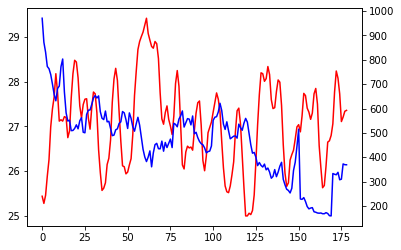

In [50]:
fig, ax = plt.subplots()
df.nino34.plot(ax=ax, style='r-')
df.종가.plot(ax=ax, style='b-', secondary_y=True)

# Random Forest Regression

In [51]:
x = df[['nino34']]
y = df['종가']

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regressor = RandomForestRegressor()
regressor.fit(x, y)

RandomForestRegressor()

In [54]:
y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))

In [55]:
np.array([6.5]).reshape(1, 1)

array([[6.5]])

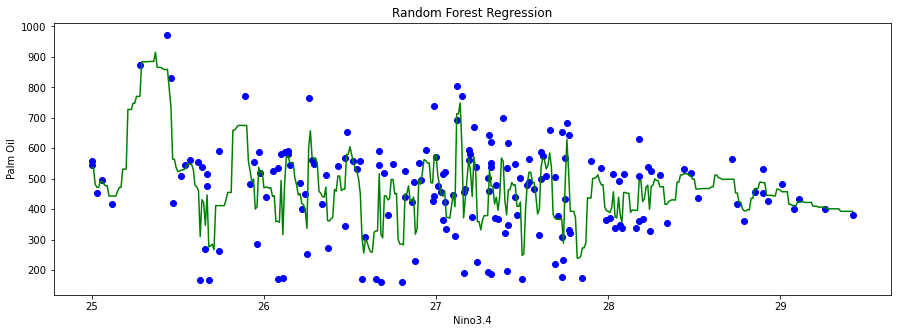

In [57]:
X_grid = np.arange(min(df['nino34']), max(df['nino34']), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'b') 
plt.plot(X_grid, regressor.predict(X_grid),color = 'green')
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Random Forest Regression')
plt.xlabel('Nino3.4')
plt.ylabel('Palm Oil')
plt.show()